In [1]:
from _utils import *

# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/10_ToniaDataset/ToniaDataset_withPolys.mat'

dataset = scipy.io.loadmat(folder_path)

# Hox locus dataset
nHox = 72
ctcfNtPolysHox = dataset['ctcfNtPolysHox']
ctcfPolysHox = dataset['ctcfPolysHox']
ntPolysHox = dataset['ntPolysHox']
radNtPolysHox = dataset['radNtPolysHox']
radPolysHox = dataset['radPolysHox']

# Sox locus dataset
nSox = 93
ctcfNtPolysSox = dataset['ctcfNtPolysSox']
ctcfPolysSox = dataset['ctcfPolysSox']
ntPolysSox = dataset['ntPolysSox']
radNtPolysSox = dataset['radNtPolysSox']
radPolysSox = dataset['radPolysSox']

# Interpolate polymers to fill in the NaN values 
ctcfNtPolysHox = interpolate_polymers(ctcfNtPolysHox)
ctcfPolysHox = interpolate_polymers(ctcfPolysHox)
ntPolysHox = interpolate_polymers(ntPolysHox)
radNtPolysHox = interpolate_polymers(radNtPolysHox)
radPolysHox = interpolate_polymers(radPolysHox)

ctcfNtPolysSox = interpolate_polymers(ctcfNtPolysSox)
ctcfPolysSox = interpolate_polymers(ctcfPolysSox)
ntPolysSox = interpolate_polymers(ntPolysSox)
radNtPolysSox = interpolate_polymers(radNtPolysSox)
radPolysSox = interpolate_polymers(radPolysSox)

# Generate distance maps from interpolated polymers
ctcfNtMapsHox = calculate_distance_map(ctcfNtPolysHox)
ctcfMapsHox = calculate_distance_map(ctcfPolysHox)
ntMapsHox = calculate_distance_map(ntPolysHox)
radNtMapsHox = calculate_distance_map(radNtPolysHox)
radMapsHox = calculate_distance_map(radPolysHox)

ctcfNtMapsSox = calculate_distance_map(ctcfNtPolysSox)
ctcfMapsSox = calculate_distance_map(ctcfPolysSox)
ntMapsSox = calculate_distance_map(ntPolysSox)
radNtMapsSox = calculate_distance_map(radNtPolysSox)
radMapsSox = calculate_distance_map(radPolysSox)

# Generate flatten maps from distance maps
ctcfNtFlattenHox = np.array([x.flatten() for x in ctcfNtMapsHox])
ctcfFlattenHox = np.array([x.flatten() for x in ctcfMapsHox])
ntFlattenHox = np.array([x.flatten() for x in ntMapsHox])
radNtFlattenHox = np.array([x.flatten() for x in radNtMapsHox])
radFlattenHox = np.array([x.flatten() for x in radMapsHox])

ctcfNtFlattenSox = np.array([x.flatten() for x in ctcfNtMapsSox])
ctcfFlattenSox = np.array([x.flatten() for x in ctcfMapsSox])
ntFlattenSox = np.array([x.flatten() for x in ntMapsSox])
radNtFlattenSox = np.array([x.flatten() for x in radNtMapsSox])
radFlattenSox = np.array([x.flatten() for x in radMapsSox])

allFlattenHox = np.concatenate((ctcfNtFlattenHox, ctcfFlattenHox, ntFlattenHox, radNtFlattenHox, radFlattenHox), axis=0)

pca_hox = PCA(n_components=2)
pca_hox.fit(allFlattenHox)
# Fit the PCA model to all Hox datasets
ctcfNtHox = pca_hox.transform(ctcfNtFlattenHox)
ctcfHox = pca_hox.transform(ctcfFlattenHox)
ntHox = pca_hox.transform(ntFlattenHox)
radNtHox = pca_hox.transform(radNtFlattenHox)
radHox = pca_hox.transform(radFlattenHox)

# Convert the principal components to a DataFrame
ctcfNtHox_df = pd.DataFrame(ctcfNtHox, columns=['PC1', 'PC2'])
ctcfNtHox_df['label'] = 'ctcfNtHox'
ctcfHox_df = pd.DataFrame(ctcfHox, columns=['PC1', 'PC2'])
ctcfHox_df['label'] = 'ctcfDegHox'
ntHox_df = pd.DataFrame(ntHox, columns=['PC1', 'PC2'])
ntHox_df['label'] = 'ntHox'
radNtHox_df = pd.DataFrame(radNtHox, columns=['PC1', 'PC2'])
radNtHox_df['label'] = 'radNtHox'
radHox_df = pd.DataFrame(radHox, columns=['PC1', 'PC2'])
radHox_df['label'] = 'radDegHox'

all_df = pd.concat([ntHox_df, radNtHox_df, radHox_df, ctcfNtHox_df, ctcfHox_df], axis=0)

# PCA for Sox locus
allFlattenSox = np.concatenate((ctcfNtFlattenSox, ctcfFlattenSox, ntFlattenSox, radNtFlattenSox, radFlattenSox), axis=0)
pca_sox = PCA(n_components=2)
pca_sox.fit(allFlattenSox)
# Fit the PCA model to all Sox datasets
ctcfNtSox = pca_sox.transform(ctcfNtFlattenSox)
ctcfSox = pca_sox.transform(ctcfFlattenSox)
ntSox = pca_sox.transform(ntFlattenSox)
radNtSox = pca_sox.transform(radNtFlattenSox)
radSox = pca_sox.transform(radFlattenSox)

# Convert the principal components to a DataFrame
ctcfNtSox_df = pd.DataFrame(ctcfNtSox, columns=['PC1', 'PC2'])
ctcfNtSox_df['label'] = 'ctcfNtSox'
ctcfSox_df = pd.DataFrame(ctcfSox, columns=['PC1', 'PC2'])
ctcfSox_df['label'] = 'ctcfDegSox'
ntSox_df = pd.DataFrame(ntSox, columns=['PC1', 'PC2'])
ntSox_df['label'] = 'ntSox'
radNtSox_df = pd.DataFrame(radNtSox, columns=['PC1', 'PC2'])
radNtSox_df['label'] = 'radNtSox'
radSox_df = pd.DataFrame(radSox, columns=['PC1', 'PC2'])
radSox_df['label'] = 'radDegSox'

all_df_sox = pd.concat([ntSox_df, radNtSox_df, radSox_df, ctcfNtSox_df, ctcfSox_df], axis=0)

# Find the lower and upper bounds of the PC1 and PC2 for Hox locus
min_pc1_hox = min(all_df['PC1'])
max_pc1_hox = max(all_df['PC1'])
min_pc2_hox = min(all_df['PC2'])
max_pc2_hox = max(all_df['PC2'])

# Find the lower and upper bounds of the PC1 and PC2 for Sox locus
min_pc1_sox = min(all_df_sox['PC1'])
max_pc1_sox = max(all_df_sox['PC1'])
min_pc2_sox = min(all_df_sox['PC2'])
max_pc2_sox = max(all_df_sox['PC2'])


2024-10-01 17:11:17.768838: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 17:11:18.177204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [2]:
# Create a grid of points for Hox locus
num_microstates = 75 # Number of microstates to generate
pc1_hox = np.linspace(min_pc1_hox, max_pc1_hox, num_microstates)
pc2_hox = np.linspace(min_pc2_hox, max_pc2_hox, num_microstates)
pc1_hox, pc2_hox = np.meshgrid(pc1_hox, pc2_hox)
pc1_hox = pc1_hox.flatten()
pc2_hox = pc2_hox.flatten()

# Put the grid points into a DataFrame
grid_hox = pd.DataFrame({'PC1': pc1_hox, 'PC2': pc2_hox})
# Sort PC2 in descending order while keeping PC1 in ascending order
grid_hox = grid_hox.sort_values(by=['PC1', 'PC2'], ascending=[True, False], ignore_index=True)

# Infer microstates from PCA for Hox locus
microstates_hox = pca_hox.inverse_transform(grid_hox)

In [3]:
# Create a grid of points for Sox locus
pc1_sox = np.linspace(min_pc1_sox, max_pc1_sox, num_microstates)
pc2_sox = np.linspace(min_pc2_sox, max_pc2_sox, num_microstates)
pc1_sox, pc2_sox = np.meshgrid(pc1_sox, pc2_sox)
pc1_sox = pc1_sox.flatten()
pc2_sox = pc2_sox.flatten()

# Put the grid points into a DataFrame
grid_sox = pd.DataFrame({'PC1': pc1_sox, 'PC2': pc2_sox})
# Sort PC2 in descending order while keeping PC1 in ascending order
grid_sox = grid_sox.sort_values(by=['PC1', 'PC2'], ascending=[True, False], ignore_index=True)

# Infer microstates from PCA for Sox locus
microstates_sox = pca_sox.inverse_transform(grid_sox)

In [4]:
microstates_hox.shape

(5625, 5184)

In [5]:
ntMapsHox.shape

(15319, 72, 72)

In [6]:
np.any(ctcfMapsHox < 0)

False

In [7]:
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.ticker import ScalarFormatter, LogFormatter

In [8]:
def check_contour_length(distance_maps):
    contour_list = []
    for dmap in distance_maps:
        contour_length = np.sum(np.diag(dmap, 1))
        contour_list.append(contour_length)
    return np.array(contour_list)
    


In [9]:
ctcfNtContourHox = check_contour_length(ctcfNtMapsHox)

In [10]:
np.any(ctcfNtContourHox < 0)

False

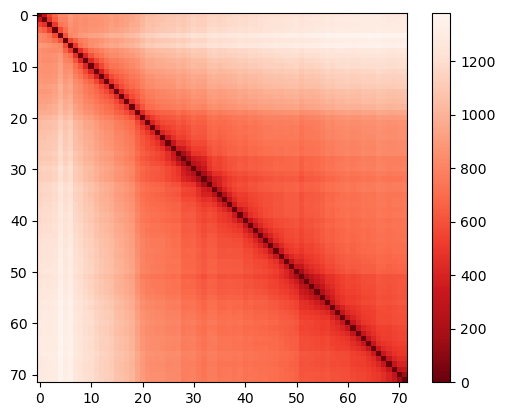

In [11]:
plt.imshow(microstates_hox[3500].reshape(nHox, nHox), cmap='Reds_r')
plt.colorbar()

In [12]:
num_microstates = 75
mcmc_path = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/MCMC_results/20240930_RunWeightMCMC_Tonia_PCA_2'

In [13]:
# Find stan_output folder path and then load the MCMC samples
# List all items in the current directory
mcmc_result = {}
for item in tqdm(os.listdir(mcmc_path)):
    # Get the full path of the item
    full_path = os.path.join(mcmc_path, item)
    
    # Check if the item is a directory
    # And if the directory contains stan_output folder
    # Check if 'stan_output' exists in the directory
    folder_path = os.path.join(full_path, 'stan_output')
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # Load the MCMC results
        mcmc_result[item] = load_weights(folder_path, num_microstates**2)

  0%|          | 0/10 [00:00<?, ?it/s]

['20240715_WeightOptimization-20240930160355_1.csv', '20240715_WeightOptimization-20240930160355_2.csv', '20240715_WeightOptimization-20240930160355_3.csv', '20240715_WeightOptimization-20240930160355_4.csv']
['20240715_WeightOptimization-20240930160335_1.csv', '20240715_WeightOptimization-20240930160335_2.csv', '20240715_WeightOptimization-20240930160335_3.csv', '20240715_WeightOptimization-20240930160335_4.csv']
['20240715_WeightOptimization-20240930160335_1.csv', '20240715_WeightOptimization-20240930160335_2.csv', '20240715_WeightOptimization-20240930160335_3.csv', '20240715_WeightOptimization-20240930160335_4.csv']
['20240715_WeightOptimization-20240930160335_1.csv', '20240715_WeightOptimization-20240930160335_2.csv', '20240715_WeightOptimization-20240930160335_3.csv', '20240715_WeightOptimization-20240930160335_4.csv']
['20240715_WeightOptimization-20240930160335_1.csv', '20240715_WeightOptimization-20240930160335_2.csv', '20240715_WeightOptimization-20240930160335_3.csv', '202407

In [14]:
mcmc_result.keys()

dict_keys(['ctcfHox', 'radNtHox', 'radSox', 'ctcfNtHox', 'radHox', 'ntHox', 'ctcfNtSox', 'radNtSox', 'ctcfSox', 'ntSox'])

In [15]:
ntHox = mcmc_result['ntHox']
radHox = mcmc_result['radHox']
ctcfHox = mcmc_result['ctcfHox']

ntSox = mcmc_result['ntSox']
radSox = mcmc_result['radSox']
ctcfSox = mcmc_result['ctcfSox']

In [16]:
# Calculate the weights of the MCMC samples
ntHox_weights = np.exp(np.array(ntHox))
radHox_weights = np.exp(np.array(radHox))
ctcfHox_weights = np.exp(np.array(ctcfHox))

ntSox_weights = np.exp(np.array(ntSox))
radSox_weights = np.exp(np.array(radSox))
ctcfSox_weights = np.exp(np.array(ctcfSox))

In [17]:
# Concatenate 4 chains into 1 big matrix
ntHox_weights = ntHox_weights.reshape(-1, num_microstates**2)
radHox_weights = radHox_weights.reshape(-1, num_microstates**2)
ctcfHox_weights = ctcfHox_weights.reshape(-1, num_microstates**2)

ntSox_weights = ntSox_weights.reshape(-1, num_microstates**2)
radSox_weights = radSox_weights.reshape(-1, num_microstates**2)
ctcfSox_weights = ctcfSox_weights.reshape(-1, num_microstates**2)

In [18]:
ntHox_weights[0]

array([1.38886040e-06, 2.99435684e-05, 1.87113570e-04, ...,
       9.55072968e-06, 3.00219133e-05, 6.49189623e-05])

In [19]:
def calculate_entropy(mcmc_sample):
    return np.array([scipy.stats.entropy(x) for x in mcmc_sample])

In [20]:
# Calculate the entropy associated with each MCMC sample
ntHox_entropy = calculate_entropy(ntHox_weights)
radHox_entropy = calculate_entropy(radHox_weights)
ctcfHox_entropy = calculate_entropy(ctcfHox_weights)

ntSox_entropy = calculate_entropy(ntSox_weights)
radSox_entropy = calculate_entropy(radSox_weights)
ctcfSox_entropy = calculate_entropy(ctcfSox_weights)

In [21]:
# Put the entropy values into a DataFrame
ntHox_entropy_df = pd.DataFrame(ntHox_entropy, columns=['entropy'])
ntHox_entropy_df['label'] = 'ntHox'
radHox_entropy_df = pd.DataFrame(radHox_entropy, columns=['entropy'])
radHox_entropy_df['label'] = 'radHox'
ctcfHox_entropy_df = pd.DataFrame(ctcfHox_entropy, columns=['entropy'])
ctcfHox_entropy_df['label'] = 'ctcfHox'

ntSox_entropy_df = pd.DataFrame(ntSox_entropy, columns=['entropy'])
ntSox_entropy_df['label'] = 'ntSox'
radSox_entropy_df = pd.DataFrame(radSox_entropy, columns=['entropy'])
radSox_entropy_df['label'] = 'radSox'
ctcfSox_entropy_df = pd.DataFrame(ctcfSox_entropy, columns=['entropy'])
ctcfSox_entropy_df['label'] = 'ctcfSox'

In [22]:
allHox_entropy_df = pd.concat([ntHox_entropy_df, radHox_entropy_df, ctcfHox_entropy_df], axis=0)
allSox_entropy_df = pd.concat([ntSox_entropy_df, radSox_entropy_df, ctcfSox_entropy_df], axis=0)

In [23]:
save_dir = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/figures/20240930'

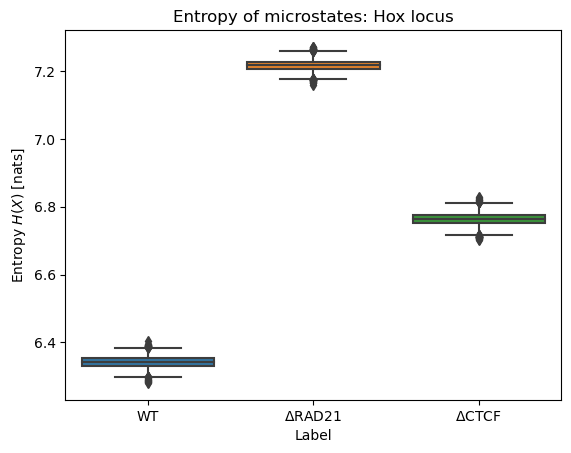

In [24]:
sns.boxplot(x='label', y='entropy', data=allHox_entropy_df)
plt.xlabel('Label')
plt.ylabel(r'Entropy $H(X)$ [nats]')
plt.title('Entropy of microstates: Hox locus')
plt.xticks([0, 1, 2], ['WT', r'$\Delta$RAD21', r'$\Delta$CTCF'])
plt.savefig(os.path.join(save_dir, 'entropy_boxplot_hox.png'), dpi=300, bbox_inches='tight')

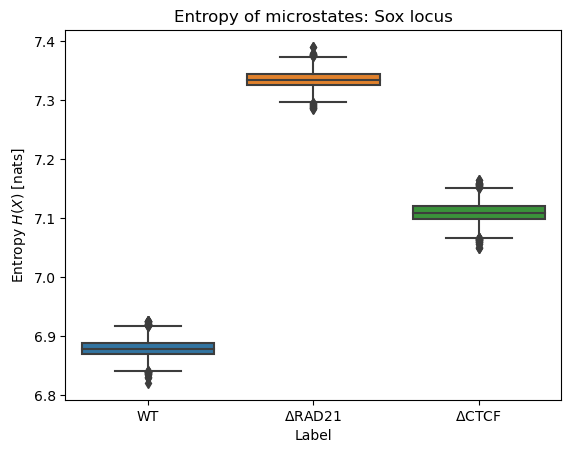

In [25]:
sns.boxplot(x='label', y='entropy', data=allSox_entropy_df)
plt.xlabel('Label')
plt.ylabel(r'Entropy $H(X)$ [nats]')
plt.title('Entropy of microstates: Sox locus')
plt.xticks([0, 1, 2], ['WT', r'$\Delta$RAD21', r'$\Delta$CTCF'])
plt.savefig(os.path.join(save_dir, 'entropy_boxplot_sox.png'), dpi=300, bbox_inches='tight')

In [26]:
np.log(75**2)

8.63497622707262

In [27]:
# Find mean weights of the MCMC samples
ntHox_mean = np.mean(ntHox_weights, axis=0)
radHox_mean = np.mean(radHox_weights, axis=0)
ctcfHox_mean = np.mean(ctcfHox_weights, axis=0)

ntSox_mean = np.mean(ntSox_weights, axis=0)
radSox_mean = np.mean(radSox_weights, axis=0)
ctcfSox_mean = np.mean(ctcfSox_weights, axis=0)

In [28]:
# Plot these mean weights in heatmaps
ntHox_mean = ntHox_mean.reshape(num_microstates, num_microstates)
radHox_mean = radHox_mean.reshape(num_microstates, num_microstates)
ctcfHox_mean = ctcfHox_mean.reshape(num_microstates, num_microstates)

ntSox_mean = ntSox_mean.reshape(num_microstates, num_microstates)
radSox_mean = radSox_mean.reshape(num_microstates, num_microstates)
ctcfSox_mean = ctcfSox_mean.reshape(num_microstates, num_microstates)

In [29]:
ntHox_mean.min(), ntHox_mean.max()

(4.5375330511160675e-05, 0.02547369893501511)

In [30]:
from matplotlib.colors import LogNorm

In [31]:
# set x and y labels for hox locus
xlabel_hox = np.array([f"{x:.1e}" for x in grid_hox['PC1'].unique()])[::10]
ylabel_hox = np.array([f"{x:.1e}" for x in grid_hox['PC2'].unique()])[::10]

In [32]:
# set x and y labels for sox locus
xlabel_sox = np.array([f"{x:.1e}" for x in grid_sox['PC1'].unique()])[::10]
ylabel_sox = np.array([f"{x:.1e}" for x in grid_sox['PC2'].unique()])[::10]

In [33]:
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.ticker import ScalarFormatter, LogFormatter

In [34]:
# D is the distance map matrix (N x N)
# Calculate the radius of gyration from a distance map 
def radius_of_gyration(D):
    N = D.shape[0]
    Rg_squared = np.sum(D**2) / (2 * N**2)
    return np.sqrt(Rg_squared)


In [35]:
# Calculate the radius of gyration for each microstate
hox_Rg = np.array([radius_of_gyration(x.reshape(nHox, nHox)) for x in microstates_hox])
sox_Rg = np.array([radius_of_gyration(x.reshape(nSox, nSox)) for x in microstates_sox])

In [36]:
# mask the microstates that have negative values
hox_mask = np.any(microstates_hox <= -1, axis=1)    
sox_mask = np.any(microstates_sox <= -1, axis=1)

hox_rg_masked = np.ma.masked_array(hox_Rg, mask=hox_mask)
sox_rg_masked = np.ma.masked_array(sox_Rg, mask=sox_mask)

In [37]:
hox_Rg.shape, hox_mask.shape

((5625,), (5625,))

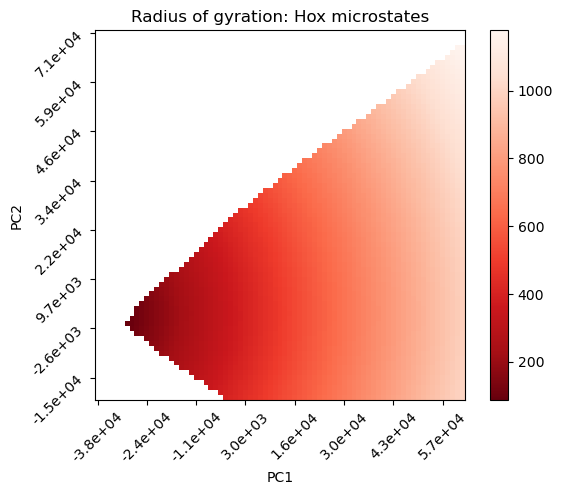

In [38]:
# Plot the radius of gyration 
plt.imshow(hox_rg_masked.reshape(num_microstates, num_microstates).T, cmap='Reds_r')
plt.colorbar()
plt.title('Radius of gyration: Hox microstates')
plt.xticks(np.arange(0, num_microstates, 10), xlabel_hox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_hox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig(os.path.join(save_dir, 'radius_of_gyration_hox.png'), dpi=300, bbox_inches='tight')

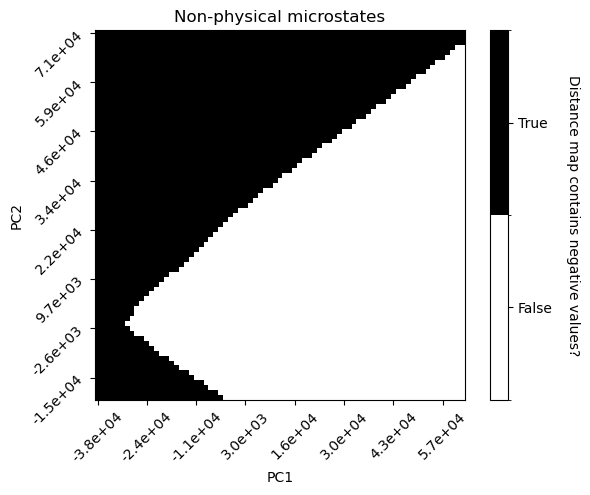

In [39]:
bounds = [0, 0.5, 1]
# Use the 'Reds' colormap
cmap = plt.get_cmap('Greys')

# Create a normalization based on the bounds
norm = BoundaryNorm(bounds, cmap.N)

plt.imshow(np.any(microstates_hox <= -1, axis=1).reshape(75, 75).T, cmap=cmap, norm=norm)
cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.set_ticklabels(['False', 'True'])
cbar.set_label('Distance map contains negative values?', rotation=270, labelpad=20)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_hox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_hox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Non-physical microstates')
plt.savefig(os.path.join(save_dir, 'microstates_physicality.png'), dpi=300, bbox_inches='tight')

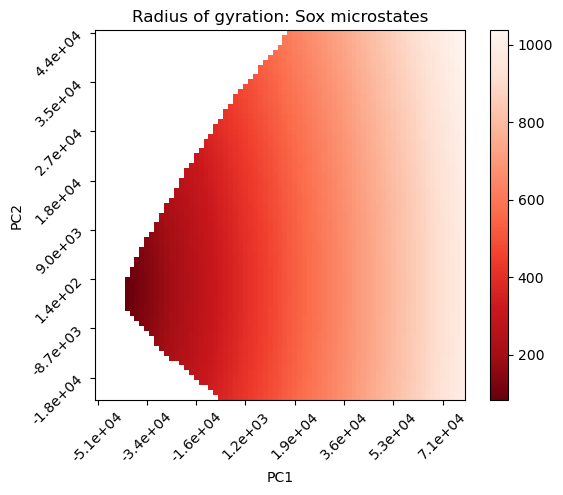

In [40]:
# Plot the radius of gyration 
plt.imshow(sox_rg_masked.reshape(num_microstates, num_microstates).T, cmap='Reds_r')
plt.colorbar()
plt.title('Radius of gyration: Sox microstates')
plt.xticks(np.arange(0, num_microstates, 10), xlabel_sox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_sox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig(os.path.join(save_dir, 'radius_of_gyration_sox.png'), dpi=300, bbox_inches='tight')

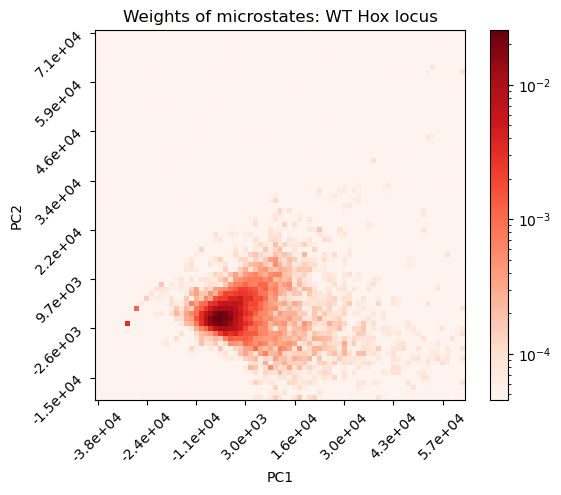

In [41]:
# Plot heatmap - colorbar is in log scale
norm = LogNorm(vmin=ntHox_mean.min(), vmax=ntHox_mean.max())
# Make sure you transpose
# Because the ordering of the matrix is different from the ordering of the heatmap
plt.imshow(ntHox_mean.T, cmap='Reds', norm=norm)  
plt.xticks(np.arange(0, num_microstates, 10), xlabel_hox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_hox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title('Weights of microstates: WT Hox locus')
plt.savefig(os.path.join(save_dir, 'ntHox_heatmap.png'), dpi=300, bbox_inches='tight')

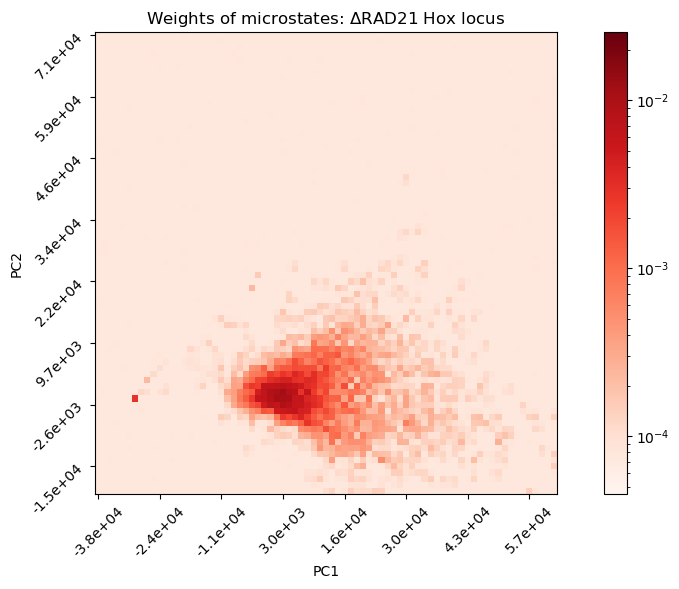

In [42]:
# Plot heatmap - colorbar is in log scale
plt.figure(figsize=(12, 6))
plt.imshow(radHox_mean.T, cmap='Reds', norm=norm)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_hox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_hox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Weights of microstates: $\Delta$RAD21 Hox locus')
plt.savefig(os.path.join(save_dir, 'rad21Hox_heatmap.png'), dpi=300, bbox_inches='tight')

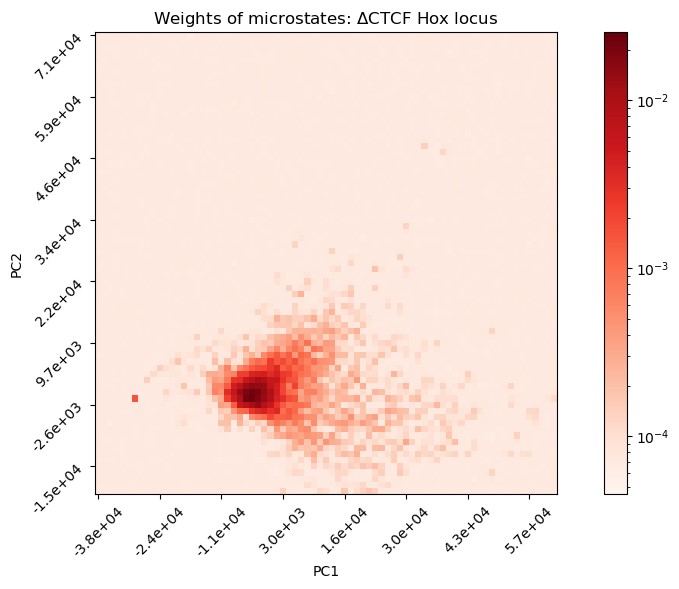

In [43]:
# Plot heatmap - colorbar is in log scale
plt.figure(figsize=(12, 6))
plt.imshow(ctcfHox_mean.T, cmap='Reds', norm=norm)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_hox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_hox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Weights of microstates: $\Delta$CTCF Hox locus')
plt.savefig(os.path.join(save_dir, 'ctcfHox_heatmap.png'), dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Hox locus: $\\log \\pi_\\mathrm{\\Delta RAD21} / \\pi_{WT}$')

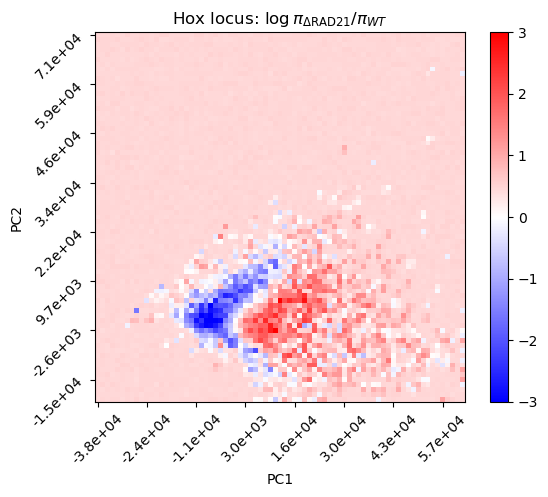

In [44]:
# Plot the log ratio of the mean weights
radHox_ntHox_ratio = np.log(radHox_mean / ntHox_mean)
plt.imshow(radHox_ntHox_ratio.T, cmap='bwr', vmin=-3, vmax=3)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_hox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_hox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Hox locus: $\log \pi_\mathrm{\Delta RAD21} / \pi_{WT}$')
# plt.savefig(os.path.join(save_dir, 'ntHox_rad21Hox_ratio_heatmap.png'), dpi=300, bbox_inches='tight')

In [45]:
radHox_weights.shape[0]

4000

In [54]:
# Now I want to perform bootstrap analysis of this ratio
num_bootstraps = 100
num_mcmc_samples = radHox_weights.shape[0]
rad21_sample_indices = np.random.randint(low=0, high=num_mcmc_samples, size=(num_bootstraps, num_microstates**2))
nt_sample_indices = np.random.randint(low=0, high=num_mcmc_samples, size=(num_bootstraps, num_microstates**2))

In [55]:
rad21_sample_indices.shape

(100, 5625)

In [47]:
radHox_weights.shape

(4000, 5625)

In [56]:
# Perform sampling
rad21_samples = radHox_weights[rad21_sample_indices]
nt_samples = ntHox_weights[nt_sample_indices]

In [57]:
rad21_samples.shape

(100, 5625, 5625)

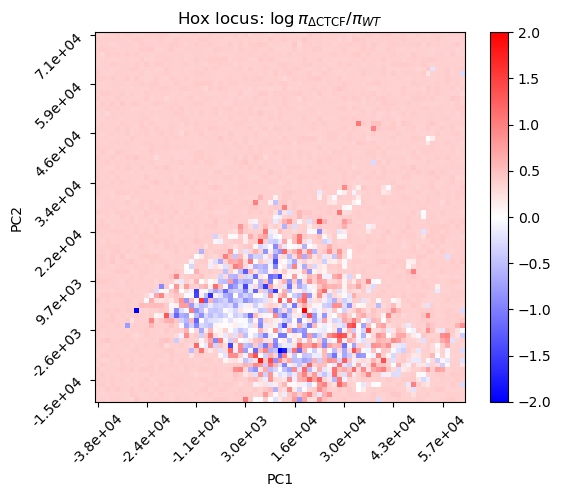

In [84]:
# Plot the log ratio of the mean weights between ctcf and nt samples
ctcfHox_ntHox_ratio = np.log(ctcfHox_mean / ntHox_mean)
plt.imshow(ctcfHox_ntHox_ratio.T, cmap='bwr', vmin=-2, vmax=2)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_hox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_hox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Hox locus: $\log \pi_\mathrm{\Delta CTCF} / \pi_{WT}$')
plt.savefig(os.path.join(save_dir, 'ntHox_ctcfHox_ratio_heatmap.png'), dpi=300, bbox_inches='tight')

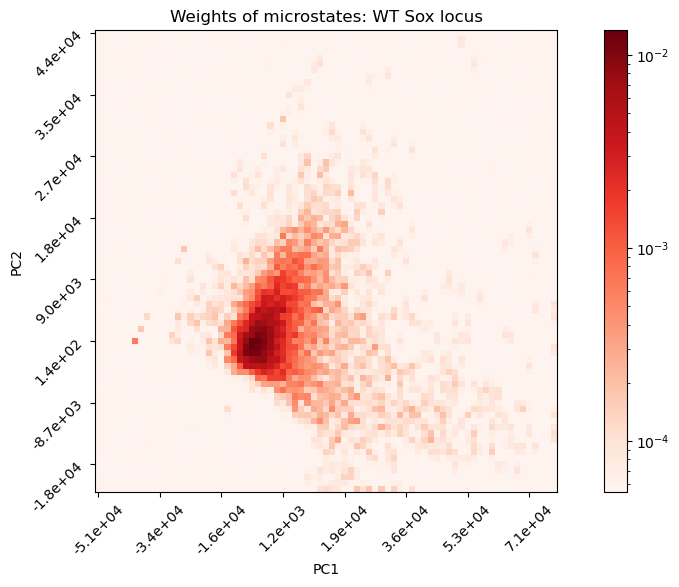

In [89]:
# Now analyze the sox locus 
# Plot heatmap - colorbar is in log scale
plt.figure(figsize=(12, 6))
norm = LogNorm(vmin=ntSox_mean.min(), vmax=ntSox_mean.max())
# Make sure you transpose
# Because the ordering of the matrix is different from the ordering of the heatmap
plt.imshow(ntSox_mean.T, cmap='Reds', norm=norm)  
plt.xticks(np.arange(0, num_microstates, 10), xlabel_sox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_sox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title('Weights of microstates: WT Sox locus')
plt.savefig(os.path.join(save_dir, 'ntSox_heatmap.png'), dpi=300, bbox_inches='tight')

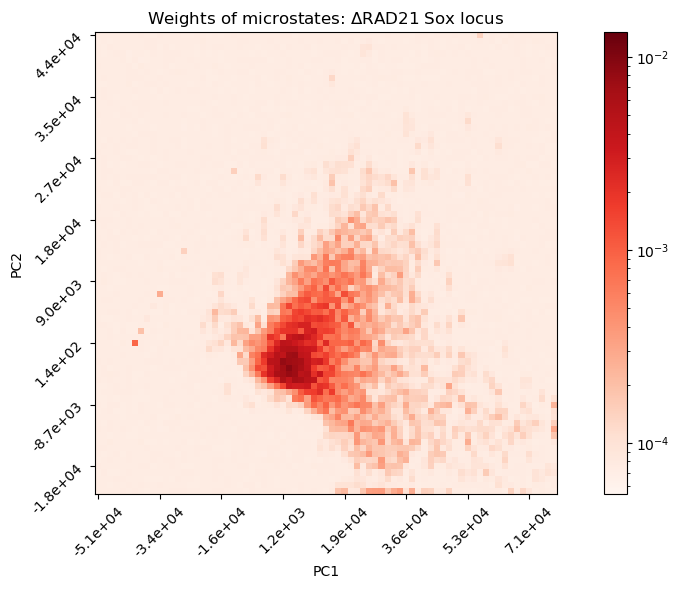

In [90]:
# Plot heatmap for rad21 condition
plt.figure(figsize=(12, 6))
plt.imshow(radSox_mean.T, cmap='Reds', norm=norm)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_sox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_sox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Weights of microstates: $\Delta$RAD21 Sox locus')
plt.savefig(os.path.join(save_dir, 'rad21Sox_heatmap.png'), dpi=300, bbox_inches='tight')

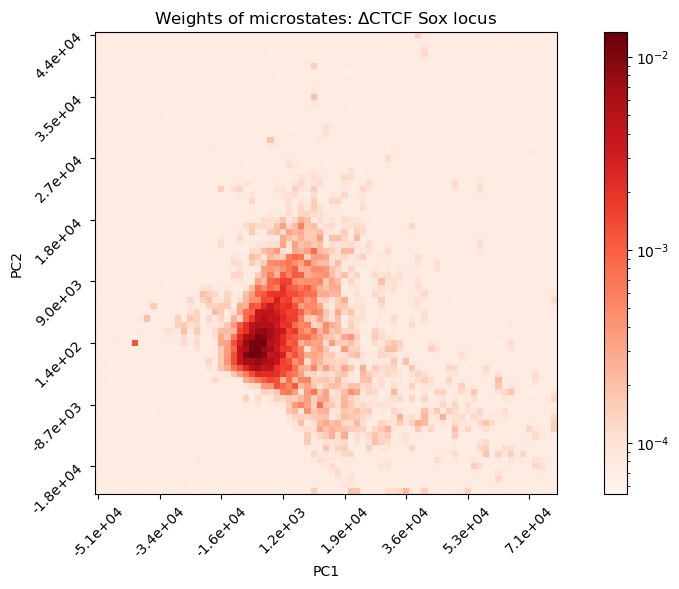

In [91]:
# Plot heatmap for ctcf condition
plt.figure(figsize=(12, 6))
plt.imshow(ctcfSox_mean.T, cmap='Reds', norm=norm)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_sox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_sox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Weights of microstates: $\Delta$CTCF Sox locus')
plt.savefig(os.path.join(save_dir, 'ctcfSox_heatmap.png'), dpi=300, bbox_inches='tight')

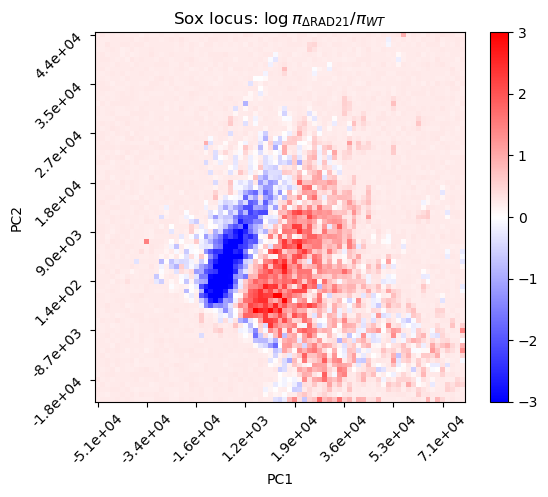

In [92]:
# Plot the log ratio of the mean weights
radSox_ntSox_ratio = np.log(radSox_mean / ntSox_mean)
plt.imshow(radSox_ntSox_ratio.T, cmap='bwr', vmin=-3, vmax=3)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_sox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_sox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Sox locus: $\log \pi_\mathrm{\Delta RAD21} / \pi_{WT}$')
plt.savefig(os.path.join(save_dir, 'ntSox_rad21Sox_ratio_heatmap.png'), dpi=300, bbox_inches='tight')

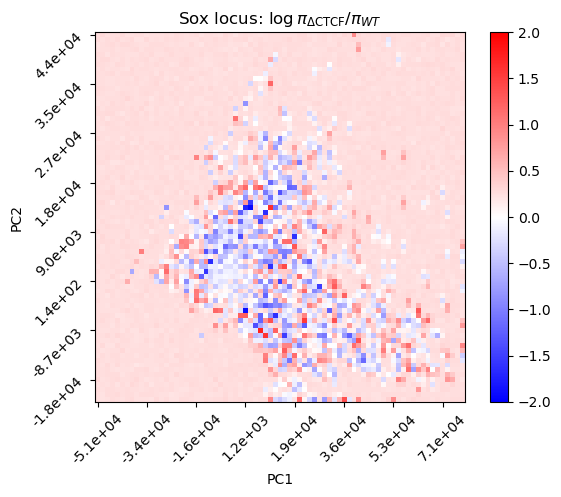

In [93]:
# Plot the log ratio of the mean weights between ctcf and nt samples
ctcfSox_ntSox_ratio = np.log(ctcfSox_mean / ntSox_mean)
plt.imshow(ctcfSox_ntSox_ratio.T, cmap='bwr', vmin=-2, vmax=2)
plt.xticks(np.arange(0, num_microstates, 10), xlabel_sox, rotation=45)
plt.yticks(np.arange(0, num_microstates, 10), ylabel_sox, rotation=45)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
plt.title(r'Sox locus: $\log \pi_\mathrm{\Delta CTCF} / \pi_{WT}$')
plt.savefig(os.path.join(save_dir, 'ntSox_ctcfSox_ratio_heatmap.png'), dpi=300, bbox_inches='tight')


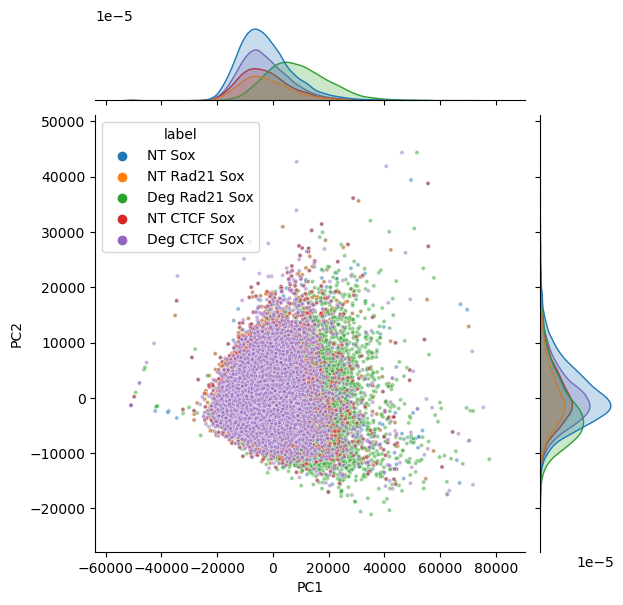

In [189]:
g = sns.jointplot(data=all_df_sox, x='PC1', y='PC2', hue='label', marker='.', alpha=0.5)
# Add custom legend using Matplotlib
# First, get the legend elements manually
handles, labels = g.ax_joint.get_legend_handles_labels()

# Customize the labels if needed
custom_labels = ['NT Sox', 'NT Rad21 Sox', 'Deg Rad21 Sox', 'NT CTCF Sox', 'Deg CTCF Sox'] # Example custom labels

# Remove any existing legend
g.ax_joint.legend_.remove()

# Add custom legend
plt.legend(handles=handles, labels=custom_labels, loc="best", title="label")
plt.savefig(os.path.join(save_dir, 'sox_locus_pca.png'), dpi=300, bbox_inches='tight')

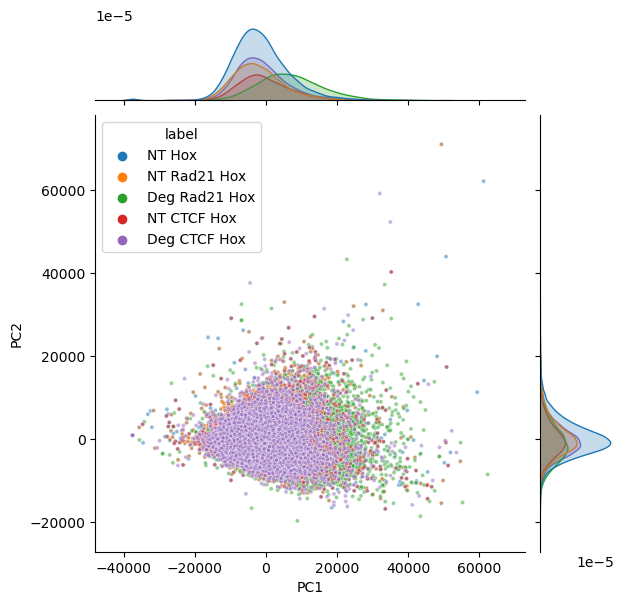

In [190]:
g = sns.jointplot(data=all_df, x='PC1', y='PC2', hue='label', marker='.', alpha=0.5)
# Add custom legend using Matplotlib
# First, get the legend elements manually
handles, labels = g.ax_joint.get_legend_handles_labels()

# Customize the labels if needed
custom_labels = ['NT Hox', 'NT Rad21 Hox', 'Deg Rad21 Hox', 'NT CTCF Hox', 'Deg CTCF Hox'] # Example custom labels

# Remove any existing legend
g.ax_joint.legend_.remove()

# Add custom legend
plt.legend(handles=handles, labels=custom_labels, loc="best", title="label")
plt.savefig(os.path.join(save_dir, 'hox_locus_pca.png'), dpi=300, bbox_inches='tight')

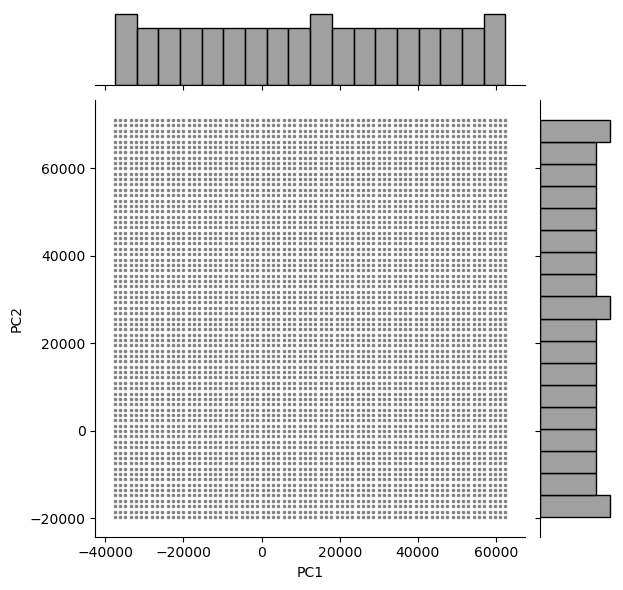

In [16]:
sns.jointplot(data=grid_hox, x='PC1', y='PC2', marker='.', color='gray', alpha=1)
plt.savefig(os.path.join(save_dir, 'hox_locus_grid.png'), dpi=300, bbox_inches='tight')

In [57]:
sampling_interval = 8 # Sampling interval for the grid points

In [64]:
grid_hox['label'] = 'Microstates'

In [65]:
hox_pc1_unique = grid_hox['PC1'].unique()[1::sampling_interval]
hox_pc2_unique = grid_hox['PC2'].unique()[1::sampling_interval]

In [66]:
grid_hox.loc[(grid_hox['PC1'].isin(hox_pc1_unique) & grid_hox['PC2'].isin(hox_pc2_unique)), 'label'] = 'Examples'

In [67]:
np.sum(grid_hox.label == 'Examples')

100

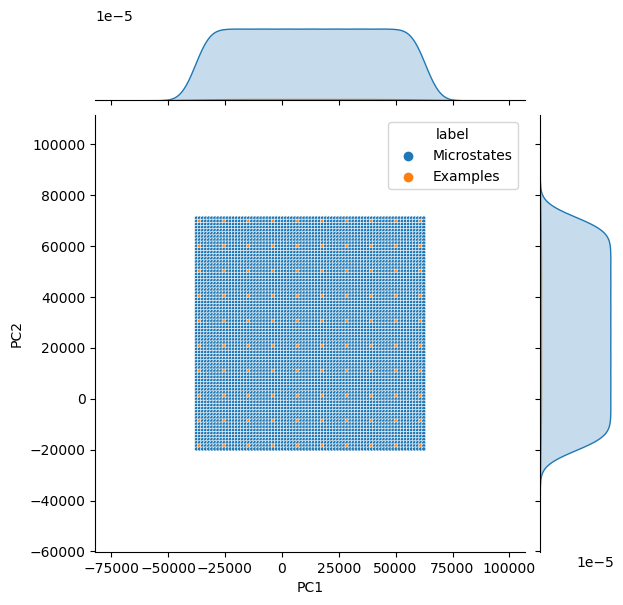

In [84]:
sns.jointplot(data=grid_hox, x='PC1', y='PC2', marker='.', hue='label', alpha=1)
plt.savefig(os.path.join(save_dir, 'hox_locus_grid.png'), dpi=300, bbox_inches='tight')

In [69]:
example_microstates_hox = grid_hox[grid_hox.label == 'Examples']

In [74]:
example_microstates_hox.index

Index([  76,   84,   92,  100,  108,  116,  124,  132,  140,  148,  676,  684,
        692,  700,  708,  716,  724,  732,  740,  748, 1276, 1284, 1292, 1300,
       1308, 1316, 1324, 1332, 1340, 1348, 1876, 1884, 1892, 1900, 1908, 1916,
       1924, 1932, 1940, 1948, 2476, 2484, 2492, 2500, 2508, 2516, 2524, 2532,
       2540, 2548, 3076, 3084, 3092, 3100, 3108, 3116, 3124, 3132, 3140, 3148,
       3676, 3684, 3692, 3700, 3708, 3716, 3724, 3732, 3740, 3748, 4276, 4284,
       4292, 4300, 4308, 4316, 4324, 4332, 4340, 4348, 4876, 4884, 4892, 4900,
       4908, 4916, 4924, 4932, 4940, 4948, 5476, 5484, 5492, 5500, 5508, 5516,
       5524, 5532, 5540, 5548],
      dtype='int64')

In [75]:
microstates_hox

array([[-1.16424724e-12, -2.75534104e+01,  1.43228526e+02, ...,
        -6.41401421e+02, -2.58522911e+02,  0.00000000e+00],
       [-1.14413623e-12, -2.65045491e+01,  1.41186471e+02, ...,
        -6.30335320e+02, -2.53981255e+02,  0.00000000e+00],
       [-1.12402521e-12, -2.54556879e+01,  1.39144417e+02, ...,
        -6.19269220e+02, -2.49439600e+02,  0.00000000e+00],
       ...,
       [ 2.82968959e-13,  4.95034252e+02,  8.06572471e+02, ...,
         8.26539265e+02,  3.65189435e+02,  0.00000000e+00],
       [ 3.03079970e-13,  4.96083113e+02,  8.04530417e+02, ...,
         8.37605365e+02,  3.69731091e+02,  0.00000000e+00],
       [ 3.23190981e-13,  4.97131974e+02,  8.02488362e+02, ...,
         8.48671466e+02,  3.74272747e+02,  0.00000000e+00]])

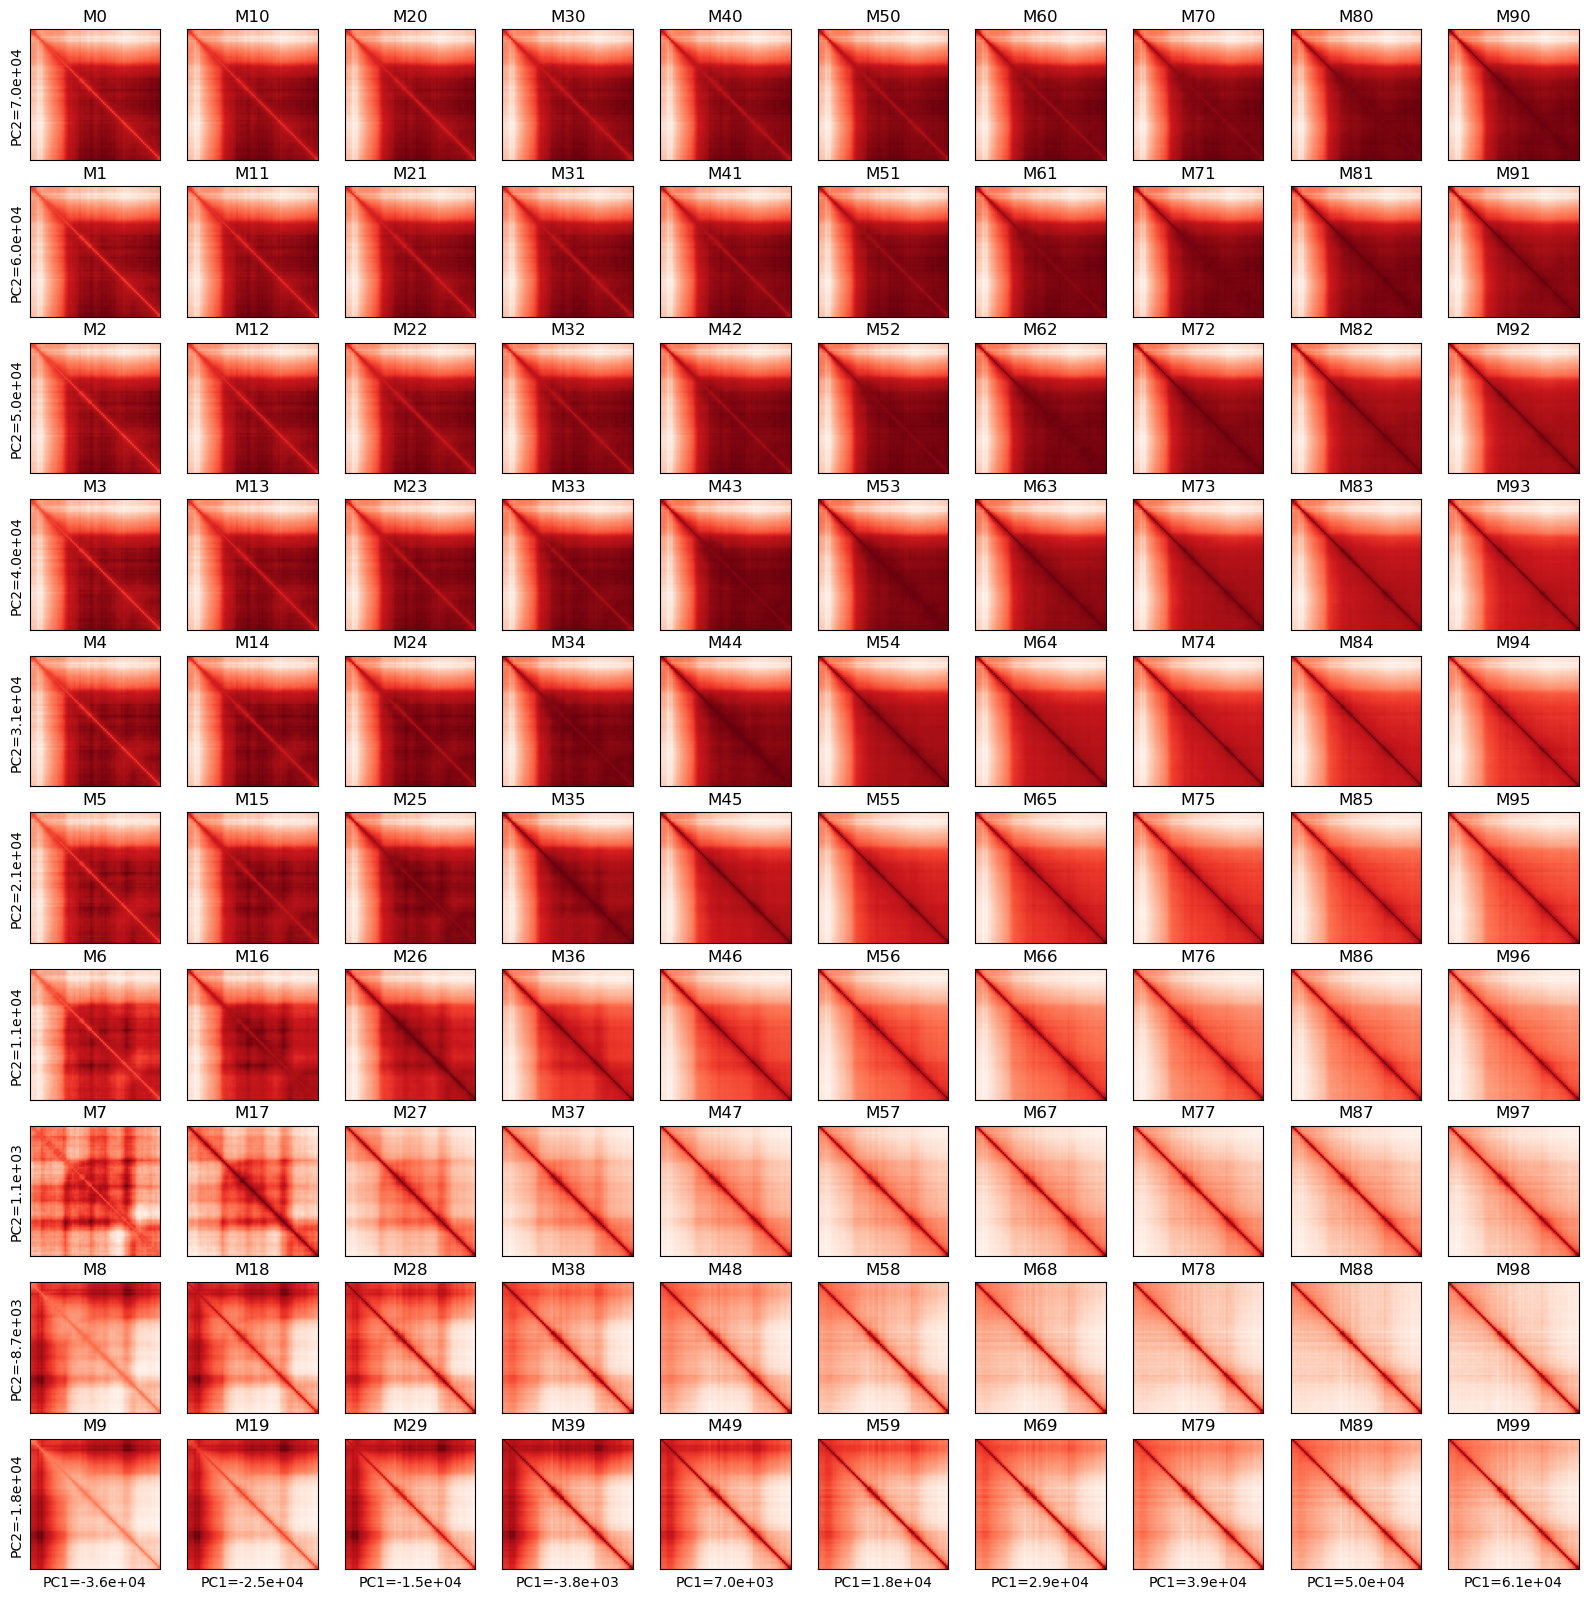

In [83]:
# Plot an example of microstates 
# Plot 10 x 10 microstates - uniformly sampled from the microstates

# Plot 10 x 10 grid of metastructures based on PC1 and PC2 
fig, axs = plt.subplots(10, 10, figsize=(20, 20))
microstates_hox_indices = example_microstates_hox.index
for i in range(100):
    ax = ax=axs[i%10, i//10]
    metastr = microstates_hox[microstates_hox_indices[i]]
    metastr = metastr.reshape((nHox, nHox))
    ax.imshow(metastr, cmap='Reds_r')
    ax.set_title(f'M{i}')
    # axs[i//10, i%10].axis('off')
    # if ax is in the first col, add a y label
    if i // 10 == 0:
        ax.set_ylabel(f'PC2={example_microstates_hox.iloc[i, 1]:.1e}')
    # if ax is in the last row, add a x label
    if i % 10 == 9:
        ax.set_xlabel(f'PC1={example_microstates_hox.iloc[i, 0]:.1e}')
        
    # Remove ticks by setting them to an empty list
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.savefig(os.path.join(save_dir, 'hox_locus_example_microstates.png'), dpi=300, bbox_inches='tight')